In [22]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000,)
(10000, 28, 28)


In [25]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [26]:
Y_train = np.zeros((len(y_train),10))
for i in range(len(y_train)):
    Y_train[i,y_train[i]] = 1

Y_test = np.zeros((len(y_test),10))
for j in range(len(y_test)):
    Y_test[j,y_test[j]] = 1

In [27]:
print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


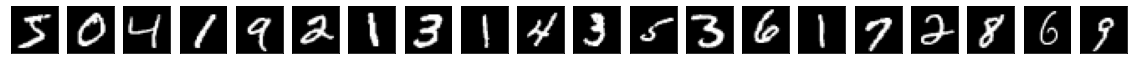

In [28]:
n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

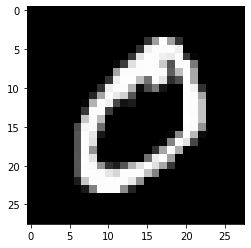

In [29]:
XX_train = x_train.astype('float32') / 255.
XX_test = x_test.astype('float32') / 255.
plt.imshow(XX_train[1].reshape(28,28))

In [30]:
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [31]:
print(XX_train.shape)
print(Y_train.shape)
print(XX_test.shape)
print(Y_test.shape)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)


In [53]:
def initialize_param(d):
    np.random.seed(1)
    params = {}
    #params['w'] = np.random.randn(d,10)*np.sqrt(2/d)
    params['w'] = np.random.randn(d,10)/np.sqrt(d)
    params['b'] = np.zeros((10,1))
    return params

In [33]:
def softmax(Z):
	expZ = np.exp(Z - np.max(Z))
	return expZ / expZ.sum(axis=0, keepdims=True)

In [34]:
def forward(params, X):
    w = params['w']
    b = params['b']
    Z = np.dot(w.T,X) + b
    A = softmax(Z)
    return A


In [35]:
def compute_cost(A,Y):
    m = Y.shape[1]
    cost = (-1/m)*np.sum(Y * np.log(A + 1e-8))
    return cost

In [36]:
def backprop(X, Y, A):
    m = Y.shape[1]
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    return dw, db

In [37]:
def optimise(params, X, Y, num_iterations, l_rate):
    costs = []
    for i in range(num_iterations):
        A = forward(params, X)
        cost = compute_cost(A, Y)
        dw, db = backprop(X, Y, A)

        params['w'] = params['w'] - l_rate * dw
        params['b'] = params['b'] - l_rate * db

        if i % 100 == 0:
            print("Cost after iteration %i : %f " %(i, cost))
        
        costs.append(cost)
    return params, costs

In [38]:
def predict(params, X, Y):
    w = params['w']
    print(w.shape,X.shape)
    probs = forward(params,X)
    y_hat = np.argmax(probs, axis=0)
    Y = np.argmax(Y, axis=0)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100
    


In [47]:
def model(d, X_train, Y_train, num_interation, l_rate):
    params = initialize_param(d)
    params, costs = optimise(params, X_train, Y_train, num_interation, l_rate)
    return params, costs

In [57]:
params, costs = model(XX_train.shape[0], XX_train, Y_train, 25000, 0.1)  

Cost after iteration 0 : 2.436488 
Cost after iteration 100 : 0.614079 
Cost after iteration 200 : 0.493491 
Cost after iteration 300 : 0.444587 
Cost after iteration 400 : 0.416616 
Cost after iteration 500 : 0.397954 
Cost after iteration 600 : 0.384356 
Cost after iteration 700 : 0.373870 
Cost after iteration 800 : 0.365458 
Cost after iteration 900 : 0.358509 
Cost after iteration 1000 : 0.352639 
Cost after iteration 1100 : 0.347592 
Cost after iteration 1200 : 0.343191 
Cost after iteration 1300 : 0.339307 
Cost after iteration 1400 : 0.335845 
Cost after iteration 1500 : 0.332733 
Cost after iteration 1600 : 0.329915 
Cost after iteration 1700 : 0.327347 
Cost after iteration 1800 : 0.324994 
Cost after iteration 1900 : 0.322827 
Cost after iteration 2000 : 0.320822 
Cost after iteration 2100 : 0.318959 
Cost after iteration 2200 : 0.317223 
Cost after iteration 2300 : 0.315599 
Cost after iteration 2400 : 0.314076 
Cost after iteration 2500 : 0.312643 
Cost after iteration 260

In [60]:
print("Train Accuracy: ",predict(params, XX_train, Y_train))

(784, 10) (784, 60000)
Train Accuracy:  92.90166666666667


In [61]:
print("Test Accuracy: ",predict(params, XX_test, Y_test))

(784, 10) (784, 10000)
Test Accuracy:  92.46


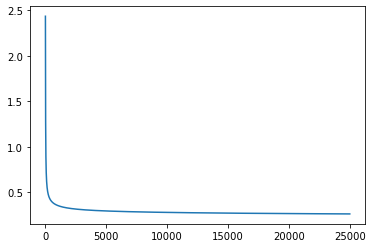

In [62]:
plt.plot(range(len(costs)),costs)

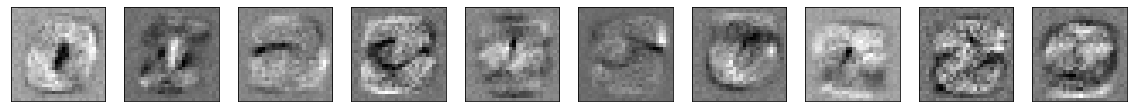

In [59]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(params['w'][:,i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()